# Deep Learning Practical Application:

**In this notebook, I will build a DEEP LEARNING Model that able to detect faces and classify the people who wearing Eye-Glasses.** 

## Data Pre-Processing
* Cropping faces 
* Read annotation/attribute data 
* Split data into two classes (e.g. Eyeglasses= 1, No-Eyeglasses=0)
* Handling the imbalance issues
* Mapping images with image-annotation
* Convert images to np-array
* Split data into training-set, testing-set
* Pickle data to use it later for model improvement

In [ ]:
## Import needed packages
import cv2
import glob
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from PIL import Image
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzip data

In [ ]:
!unzip /content/drive/MyDrive/Task1_eyeglass_detection/img_align_celeba_cropped.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba_cropped/095627.jpg  
  inflating: img_align_celeba_cropped/059683.jpg  
  inflating: img_align_celeba_cropped/120364.jpg  
  inflating: img_align_celeba_cropped/076234.jpg  
  inflating: img_align_celeba_cropped/109294.jpg  
  inflating: img_align_celeba_cropped/012038.jpg  
  inflating: img_align_celeba_cropped/117210.jpg  
  inflating: img_align_celeba_cropped/008658.jpg  
  inflating: img_align_celeba_cropped/110487.jpg  
  inflating: img_align_celeba_cropped/064182.jpg  
  inflating: img_align_celeba_cropped/112694.jpg  
  inflating: img_align_celeba_cropped/090366.jpg  
  inflating: img_align_celeba_cropped/033472.jpg  
  inflating: img_align_celeba_cropped/064013.jpg  
  inflating: img_align_celeba_cropped/191489.jpg  
  inflating: img_align_celeba_cropped/127618.jpg  
  inflating: img_align_celeba_cropped/026283.jpg  
  inflating: img_align_celeba_cropped/164619.jpg  
  inflating: img_align_celeba_c

### Cropping Faces:
**I used CascadeClassifier to extracting the faces from images**


In [ ]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

#select the path
path = "/Users/hs/Documents/img_align_celeba/*.*"
img_number = 1  #Start an iterator for image number.

img_list = glob.glob(path)

#Extract faces from a subset of images to be used for training.
#Resize to 128x128
for file in img_list[0:100]:
    print(file)     #just stop here to see all file names printed
    img= cv2.imread(file, 1)  #now, we can read each file since we have the full path
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    try:
        for (x,y,w,h) in faces:
            roi_color = img[y:y+h, x:x+w] 
        resized = cv2.resize(roi_color, (128,128))
        cv2.imwrite("test_cropped_faces/"+str(img_number)+".jpg", resized)
    except:
        print("No faces detected")
    
    
    img_number +=1     

### Read annotation/attribute data:

In [ ]:
# read data
df_path = '/content/drive/MyDrive/annotation.csv'
df = pd.read_csv(df_path)

### Split data into two classes:

**by doing the spilt step and just take a sample**

In [ ]:
df.Eyeglasses.value_counts()

0    189406
1     13193
Name: Eyeglasses, dtype: int64

In [ ]:
# dataset that has NOT Eyeglasses 
df_no_glasses =  df.loc[df['Eyeglasses'] == 0]
# slice data to be equally with Eyeglasses set 
df_no_glasses = df_no_glasses.iloc[:13193, :]
# print data shape
df_no_glasses.shape

(13193, 2)

In [ ]:
# dataset that has only Eyeglasses 
df_glasses = df.loc[df['Eyeglasses'] == 1]
# print data shape
df_glasses.shape

(13193, 2)

### Image mapping:
**In this step I will map images using annotation file, and resize the data**

In [ ]:
label = []
images = []
file_path = '/content/img_align_celeba_cropped'

for img in df_glasses.image_id:
    path = f"{file_path}/{img}"
    try:
        image = np.array(Image.open(path))
        image = np.resize(image, (128, 128, 3))
        image = image.astype('float32')
        image /= 255
        
        label.append(1)
        images.append(image)
    except:
        print(path)

/content/img_align_celeba_cropped/005057.jpg
/content/img_align_celeba_cropped/024184.jpg
/content/img_align_celeba_cropped/042511.jpg
/content/img_align_celeba_cropped/051688.jpg
/content/img_align_celeba_cropped/060469.jpg
/content/img_align_celeba_cropped/072394.jpg
/content/img_align_celeba_cropped/078587.jpg
/content/img_align_celeba_cropped/080478.jpg
/content/img_align_celeba_cropped/093965.jpg
/content/img_align_celeba_cropped/125165.jpg
/content/img_align_celeba_cropped/125706.jpg
/content/img_align_celeba_cropped/128641.jpg
/content/img_align_celeba_cropped/129992.jpg
/content/img_align_celeba_cropped/154455.jpg
/content/img_align_celeba_cropped/154814.jpg
/content/img_align_celeba_cropped/157514.jpg
/content/img_align_celeba_cropped/160464.jpg
/content/img_align_celeba_cropped/178465.jpg


In [ ]:
for img in df_no_glasses.image_id:
    path = f"{file_path}/{img}"
    try:
        image = np.array(Image.open(path))
        image = np.resize(image, (128, 128, 3)) #117, 85, 3
        image = image.astype('float32')
        image /= 255
        
        label.append(0)
        images.append(image)
    except:
        print(path)

/content/img_align_celeba_cropped/000199.jpg
/content/img_align_celeba_cropped/002270.jpg
/content/img_align_celeba_cropped/002442.jpg
/content/img_align_celeba_cropped/004556.jpg
/content/img_align_celeba_cropped/006866.jpg
/content/img_align_celeba_cropped/006985.jpg
/content/img_align_celeba_cropped/007338.jpg
/content/img_align_celeba_cropped/008708.jpg
/content/img_align_celeba_cropped/009468.jpg
/content/img_align_celeba_cropped/009632.jpg
/content/img_align_celeba_cropped/010250.jpg
/content/img_align_celeba_cropped/010502.jpg
/content/img_align_celeba_cropped/010945.jpg
/content/img_align_celeba_cropped/011793.jpg
/content/img_align_celeba_cropped/013014.jpg


In [ ]:
img_data_array = np.array(images, np.float32)
class_name = np.array(label)

In [ ]:
print(len(img_data_array))
print(len(class_name))

26353
26353


### Save data with pickle

In [ ]:
file_name = "images_list.pkl"

open_file = open(file_name, "wb")
pickle.dump(img_data_array, open_file)
open_file.close()

In [ ]:
file_name = "label_list.pkl"

open_file = open(file_name, "wb")
pickle.dump(class_name, open_file)
open_file.close()

### Read pickled data

In [ ]:
file_name = '/content/drive/MyDrive/images_list.pkl'

open_file = open(file_name, "rb")
img_data_array = pickle.load(open_file)
open_file.close()

print(img_data_array.shape)

(26353, 117, 85, 3)


In [ ]:
file_name = '/content/drive/MyDrive/label_list.pkl'

open_file = open(file_name, "rb")
class_name = pickle.load(open_file)
open_file.close()

print(class_name.shape)

(26353,)


### split data into training-set, testing-set:

In [ ]:
x_train, x_test, y_train, y_test = (train_test_split(img_data_array, class_name, test_size = .15, random_state = 42))

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22400, 117, 85, 3)
(22400,)
(3953, 117, 85, 3)
(3953,)


## Train model with CNN:

In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.applications.vgg16 import VGG16
from keras.losses import categorical_crossentropy
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, InputLayer, Dropout, GlobalAveragePooling2D
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow as Tensor_Bord
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

### Initiate CallbackList:
* EarlyStopping: stop the training when there is no improvement in val_accuracy
* ModelCheckpoint: to save a model or weights (in a checkpoint file)
* Tensor_Board: a visualization tool provided with TensorFlow

In [ ]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 8, verbose= 1, mode='auto')

mc = ModelCheckpoint(filepath="CNN_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

nn_TensorBoard = Tensor_Bord.keras.callbacks.TensorBoard(log_dir="logs/CNN_model", histogram_freq=1)

### Build the Convolutional Neural Network (CNN) architecture:

In [ ]:
inputShape = (117, 85, 3)
NN = Sequential()
NN.add(InputLayer(input_shape=inputShape))
NN.add(Conv2D(filters=80, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=90, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=110, kernel_size=3, activation='relu', padding='same'))
NN.add(GlobalAveragePooling2D())
NN.add(Dense(240, activation='relu'))
NN.add(Dropout(0.4))
NN.add(Dense(200, activation='relu'))
NN.add(Dropout(0.3))
NN.add(Dense(170, activation='relu'))
NN.add(Dropout(0.3))
NN.add(Dense(2))
NN.add(Activation("sigmoid"))

In [ ]:
# print CNN parametres
print(NN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 117, 85, 80)       2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 42, 80)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 42, 90)        64890     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 21, 90)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 21, 110)       89210     
                                                                 
 global_average_pooling2d (G  (None, 110)              0

### Trian model:

In [ ]:
NN.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
NN.fit(x_train, y_train, epochs=300, verbose=1,  callbacks=[nn_TensorBoard ,es , mc ],  validation_split=0.20,)

Epoch 1/300
557/560 [============================>.] - ETA: 0s - loss: 0.6789 - accuracy: 0.5507
Epoch 1: val_accuracy improved from -inf to 0.61920, saving model to CNN_model.h5
560/560 [==============================] - 19s 18ms/step - loss: 0.6793 - accuracy: 0.5509 - val_loss: 0.6549 - val_accuracy: 0.6192
Epoch 2/300
560/560 [==============================] - ETA: 0s - loss: 0.6206 - accuracy: 0.6618
Epoch 2: val_accuracy improved from 0.61920 to 0.64621, saving model to CNN_model.h5
560/560 [==============================] - 9s 16ms/step - loss: 0.6206 - accuracy: 0.6618 - val_loss: 0.6098 - val_accuracy: 0.6462
Epoch 3/300
557/560 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7342
Epoch 3: val_accuracy improved from 0.64621 to 0.75625, saving model to CNN_model.h5
560/560 [==============================] - 9s 16ms/step - loss: 0.5383 - accuracy: 0.7347 - val_loss: 0.4981 - val_accuracy: 0.7563
Epoch 4/300
559/560 [============================>.] - ETA: 

### Visualizing the model by using TensorBoard:

In [ ]:
!tensorboard --logdir='/content/logs'


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)


### CNN Result:
* Training Accuracy: 0.9208
* Training Loss: 0.1922
* Validation Accuracy: 0.2630
* Validation Accuracy: 0.8968

<br>

***After training the model in CNN, we could say the results are satisfying so far, but we will try with transfer learning technique, hoping in improving the results*** 

## Transform Learning:
**Using the VGG16 Pre-Trained model in order to perform the transform learning**

In [ ]:
# Working with pre trained model 
base_model = VGG16(weights='imagenet', input_shape=(117, 85, 3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

## input layer
inp = Flatten()(base_model.output)

## hidden layer & dropout --> number 1
hidden1 = Dense(265, activation='relu')(inp)
hidden2 = Dense(265, activation='relu')(hidden1)
hidden3 = Dense(265, activation='relu')(hidden2)
drop1   = Dropout(0.3)(hidden3)
output = Dense(2 , activation='softmax' )(drop1)

model = Model(base_model.input, output)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
es_pre = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 8, verbose= 1, mode='auto')

mc_pre = ModelCheckpoint(filepath="pre-trained_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

nn_TensorBoard_pre = Tensor_Bord.keras.callbacks.TensorBoard(log_dir="logs/pre-trained_model", histogram_freq=1)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=300, verbose=1,  callbacks=[nn_TensorBoard_pre ,es_pre , mc_pre ],  validation_split=0.20,)

Epoch 1/300
559/560 [============================>.] - ETA: 0s - loss: 0.4582 - accuracy: 0.7770
Epoch 1: val_accuracy improved from -inf to 0.83527, saving model to pre-trained_model.h5
560/560 [==============================] - 18s 30ms/step - loss: 0.4580 - accuracy: 0.7772 - val_loss: 0.3720 - val_accuracy: 0.8353
Epoch 2/300
560/560 [==============================] - ETA: 0s - loss: 0.3732 - accuracy: 0.8292
Epoch 2: val_accuracy did not improve from 0.83527
560/560 [==============================] - 17s 30ms/step - loss: 0.3732 - accuracy: 0.8292 - val_loss: 0.3617 - val_accuracy: 0.8330
Epoch 3/300
558/560 [============================>.] - ETA: 0s - loss: 0.3424 - accuracy: 0.8438
Epoch 3: val_accuracy did not improve from 0.83527
560/560 [==============================] - 17s 30ms/step - loss: 0.3422 - accuracy: 0.8438 - val_loss: 0.4038 - val_accuracy: 0.8112
Epoch 4/300
560/560 [==============================] - ETA: 0s - loss: 0.3222 - accuracy: 0.8527
Epoch 4: val_accuracy

In [ ]:
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
import numpy as np 

In [ ]:
# Loading the best fit model 
model = load_model("/content/CNN_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

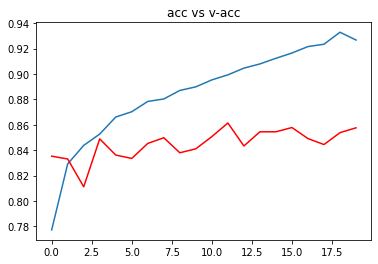

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

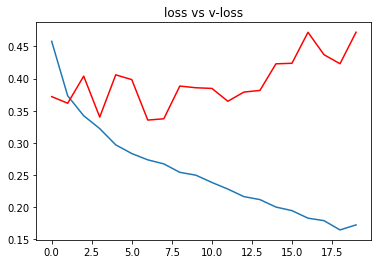

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# path for the image to see if it predics correct class

path = "/content/97.jpg"
img = load_img(path, target_size=(117, 85) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

pred_value = ''

if pred == 0:
  pred_value = 'No Eyeglasses'
elif pred == 1:
  pred_value = 'Eyeglasses'
else:
  pred_value = 'Could NOT Predict'


Eyeglasses


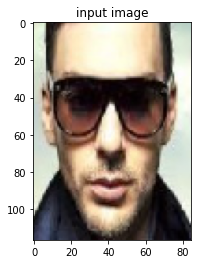

In [ ]:

print(pred_value)

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

No Eyeglasses


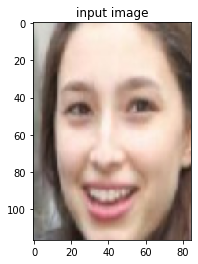

In [ ]:
print(pred_value)

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()